## Plan for the project:
<b>1.Change in price of stock over time<br>
    2.Correlation between stocks <br>
    3.How can we attempt to predict future stock behaviour

## IMPORTING DEPENDENCIES

In [3]:
!pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00


In [5]:
!pip install yfinance

     ---------------------------------------- 65.3/65.3 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
tensorboard 2.12.3 requires google-auth<3,>=1.6.3, but you have google-auth 1.4.2 which is incompatible.
google-auth-oauthlib 1.0.0 requires google-auth>=2.15.0, but you have google-auth 1.4.2 which is incompatible.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.
anaconda-client 1.11.2 requires six>=1.15.0, but you have six 1.12.0 which is incompatible.
anaconda-client 1.11.2 requires urllib3>=1.26.4, but you have urllib3 1.24.3 which is incompatible.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#READING STOCK DATA FROM YAHOO LIBRARY
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

from datetime import datetime

tech_list =  ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)
    #globals()-->assign the stock data to a global variable
company_list = [AAPL,GOOG,MSFT,AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company,com_name in zip(company_list,company_name):
    company["company_name"] = com_name

df = pd.concat(company_list,axis=0)
df.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34108400,AMAZON
2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100,AMAZON
2023-08-30,134.929993,135.679993,133.919998,135.070007,135.070007,36137000,AMAZON
2023-08-31,135.059998,138.789993,135.000000,138.009995,138.009995,58781300,AMAZON
2023-09-01,139.460007,139.960007,136.880005,138.119995,138.119995,40948300,AMAZON


In [7]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,160.030841,161.818720,158.466560,160.228000,159.748088,6.951831e+07
std,18.799133,18.558896,19.082747,18.811639,18.985138,2.395014e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,145.812500,147.320004,143.957497,145.915001,145.256310,5.134168e+07
50%,154.719994,156.915001,153.360001,154.824997,154.193527,6.478780e+07
75%,177.112503,178.324993,175.962498,176.522507,176.522507,8.116722e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-09-06 to 2023-09-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


### CLOSING PRICE

CLOSING PRICE --> Last price at which the stock is traded during the regular trading day

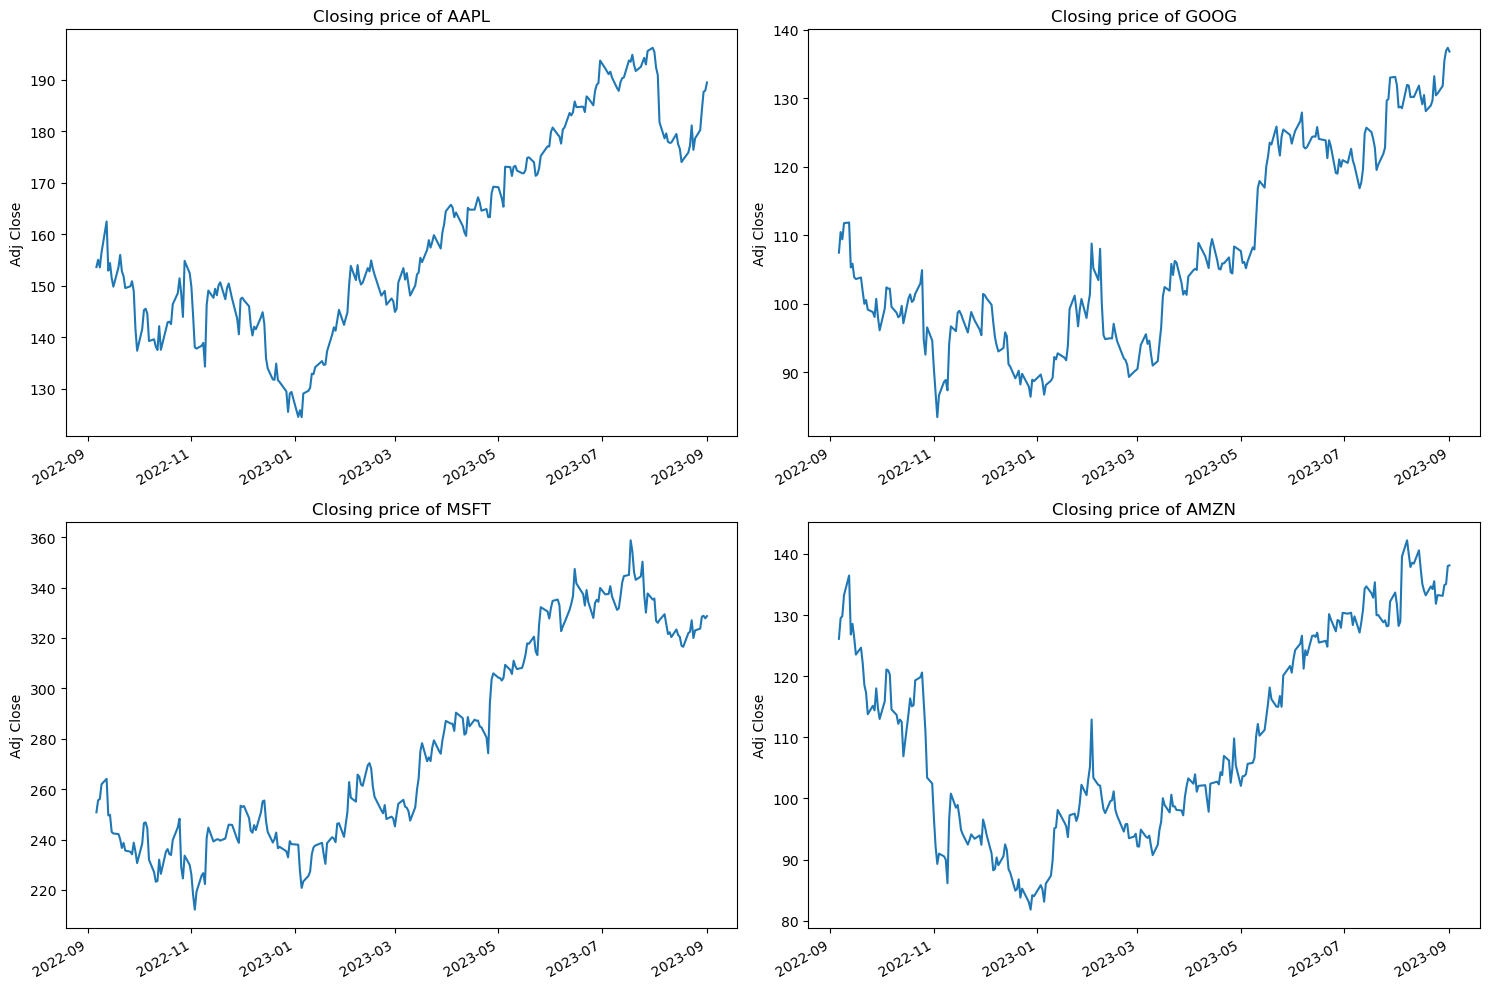

In [11]:
plt.figure(figsize=(15,10))

for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing price of {tech_list[i-1]}")
plt.tight_layout()

#### INFERENCE:
1.AAPL -->THERE IS A GRADUAL RISE IN THE CLOSING PRICE FROM THE BEGINNING OF THIS YEAR BUT THERE IS A DECREASE IN THE LAST MONTH(AUGUST) <br>
2.GOOG -->THERE IS A VERY GREAT DIFFERENCE IN THE CLOSING PRICE FROM THE BEGINNING OF THIS YEAR, BUT THE VALUE DEPRECIATES AS THE VALUE INCREASED <br>
3.MSFT -->AN OVERALL INCREASE IN CLOSING PRICE CAN BE OBSERVED WITH A LITTLE DECLINE IN THE PREVIOUS MONTH.<br>
4.AMZN -->THE CLOSING VALUE WAS AT ITS LOWEST AT THE BEGINNING OF THE YEAR BUT HAS GRADUALLY INCREASED TO THE CLOSING PRICE OF OTHER COMPANIES

### Volume of Sales


VOLUME OF SALES -->Volume of stock being traded each day. For instance, the number of shares of a securities traded between its daily open and close would be referred to as the stock trading volume.

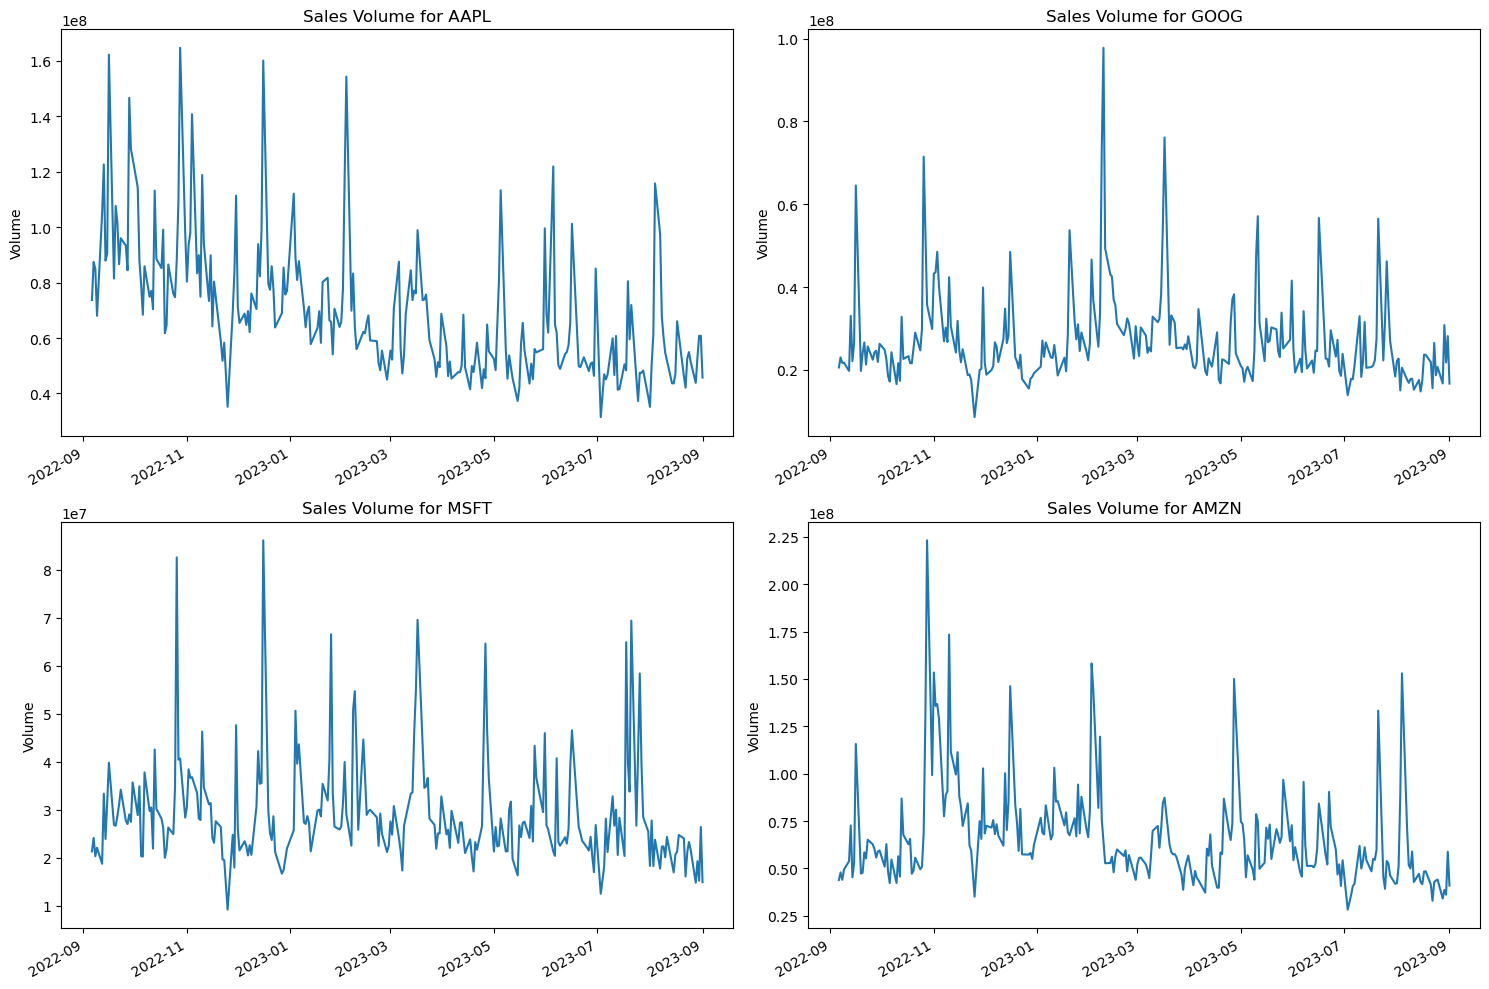

In [12]:
plt.figure(figsize=(15,10))

for i,company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

#### Finding the moving average of the various stocks

MOVING AVERAGE -->The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like <B>10 days, 20 minutes, 30 weeks</B>, or any time period the trader chooses.

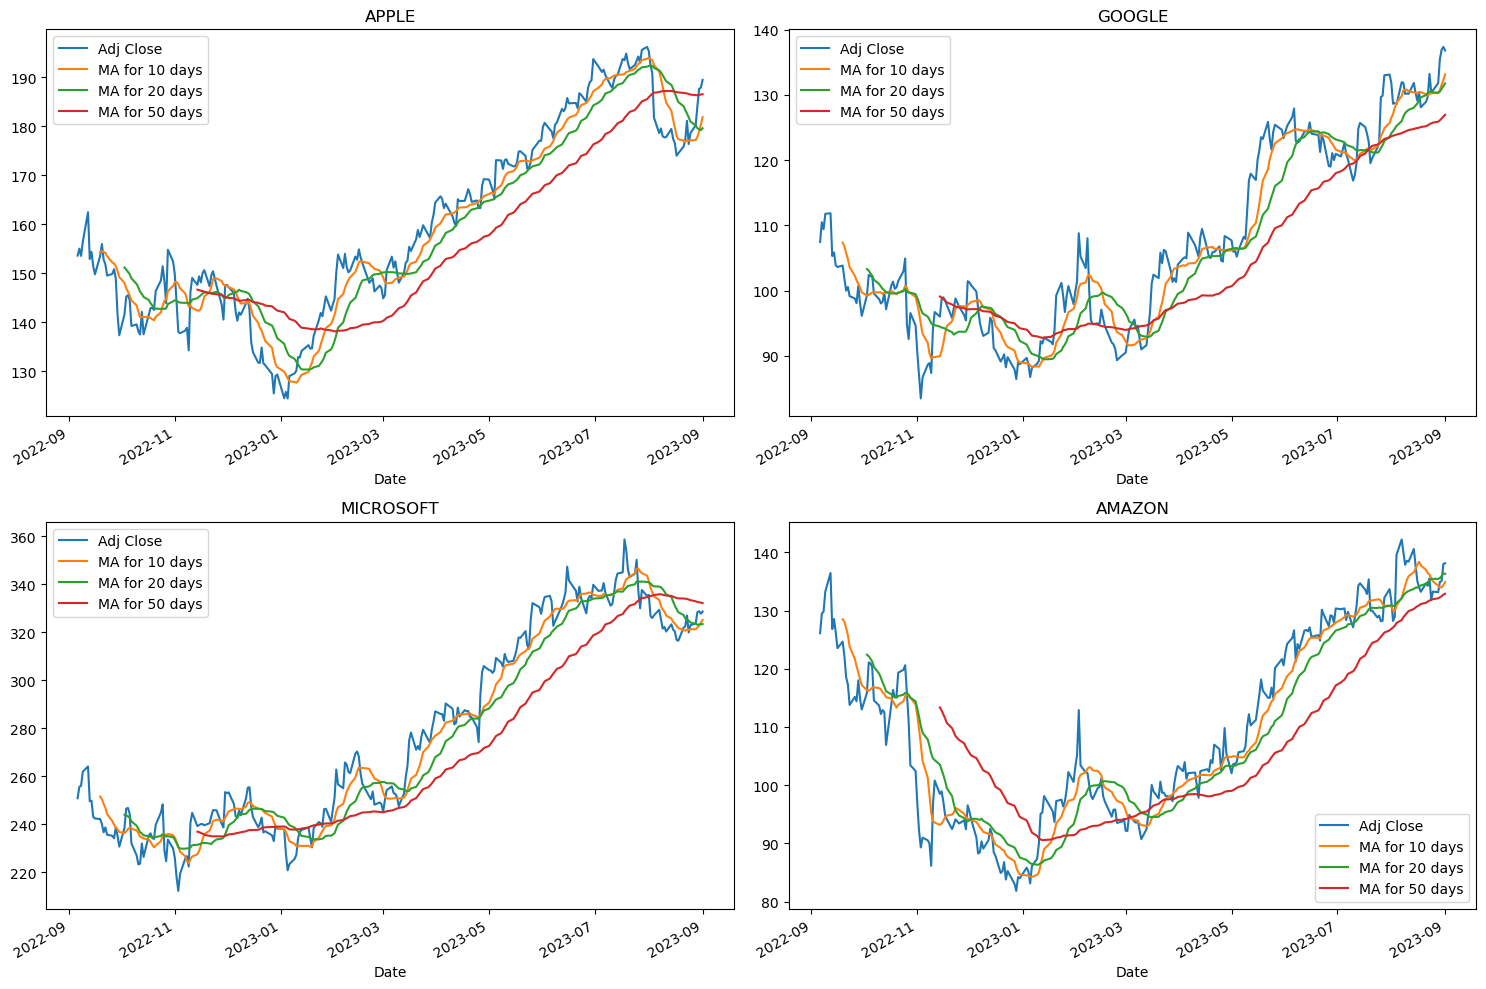

In [13]:
ma_day = [10,20,50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout() 

## Average daily return using a histogram

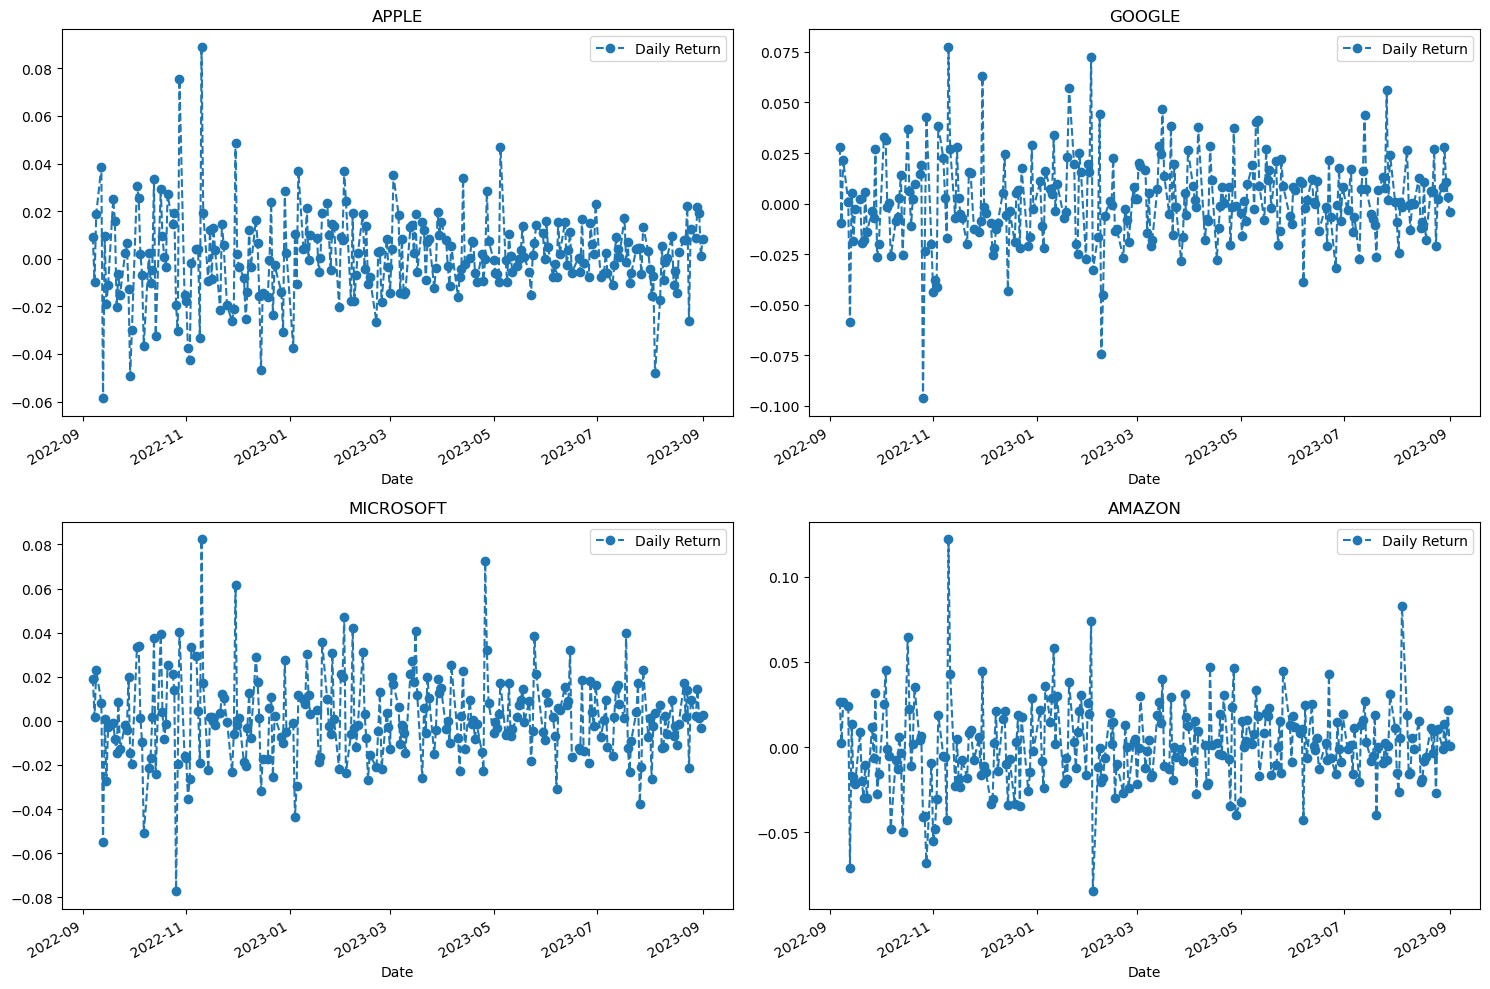

In [18]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Correlation between different stocks closing prices

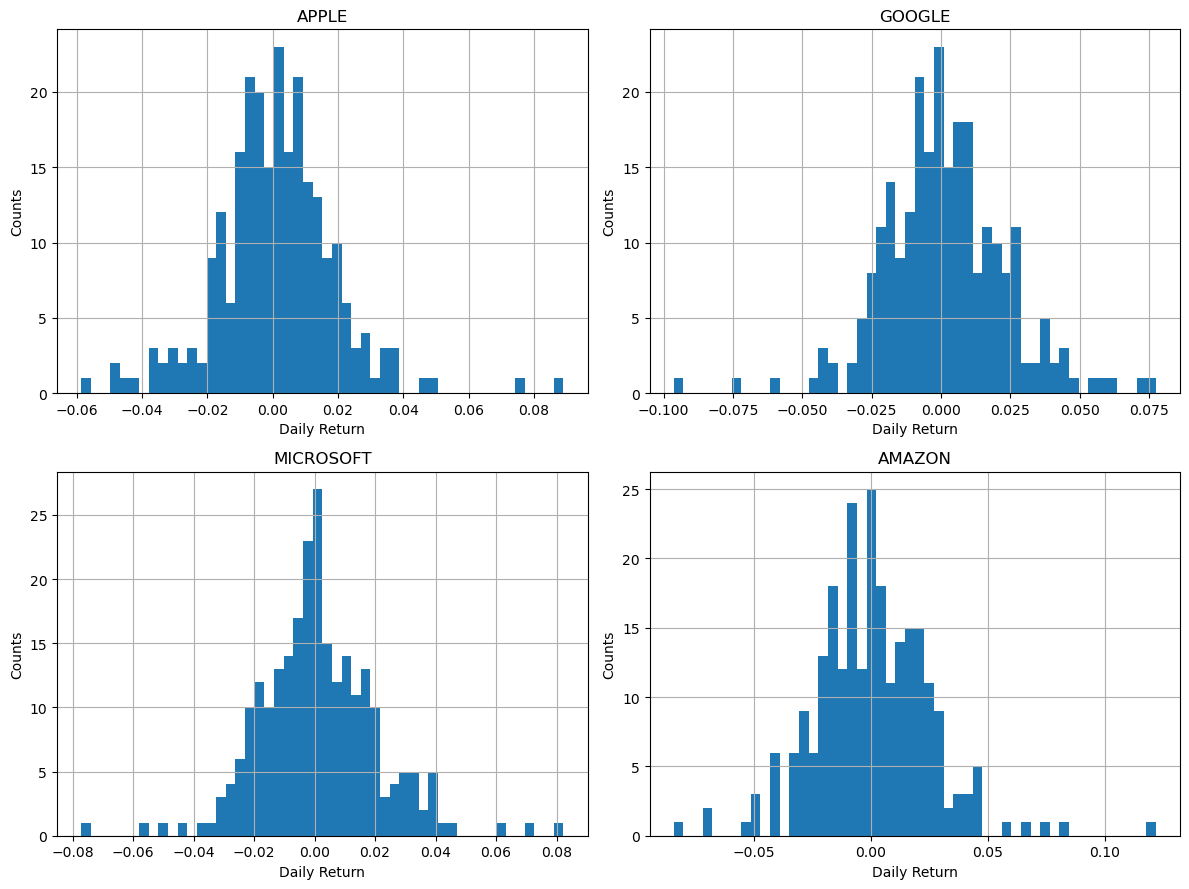

In [19]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [32]:
returns_list = [company['Adj Close'].pct_change() for company in company_list]

# Create a new DataFrame for tech returns
tech_returns_df = pd.concat(returns_list, axis=1)
tech_returns_df.columns = tech_list
tech_returns_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-09-06,NaN,NaN,NaN,NaN
2022-09-07,0.009254,0.027912,0.019112,0.026723
2022-09-08,-0.009618,-0.009595,0.001666,0.002626
2022-09-09,0.018840,0.021568,0.022977,0.026575
2022-09-12,0.038508,0.000805,0.008281,0.023861


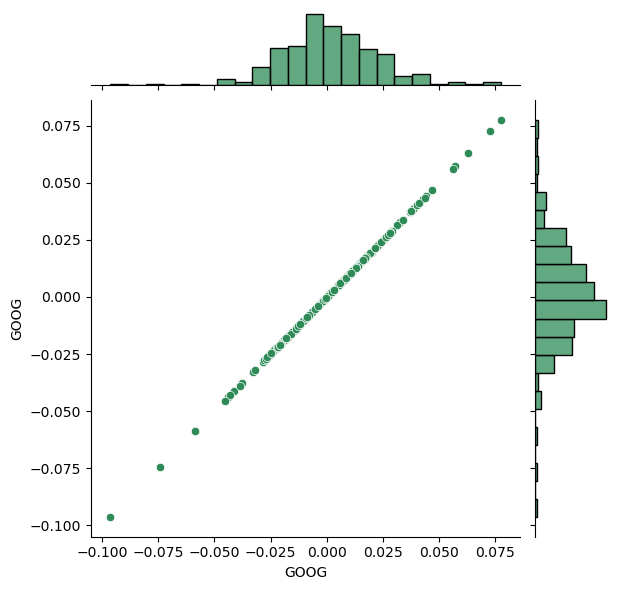

In [33]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_returns_df, kind='scatter', color='seagreen')

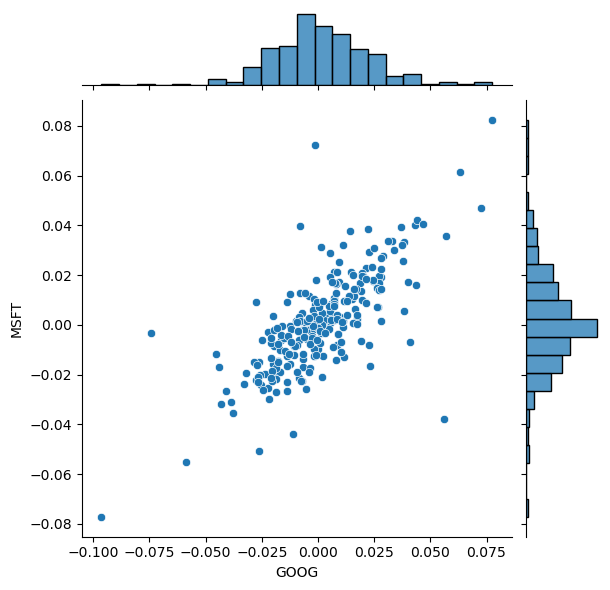

In [34]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_returns_df, kind='scatter')

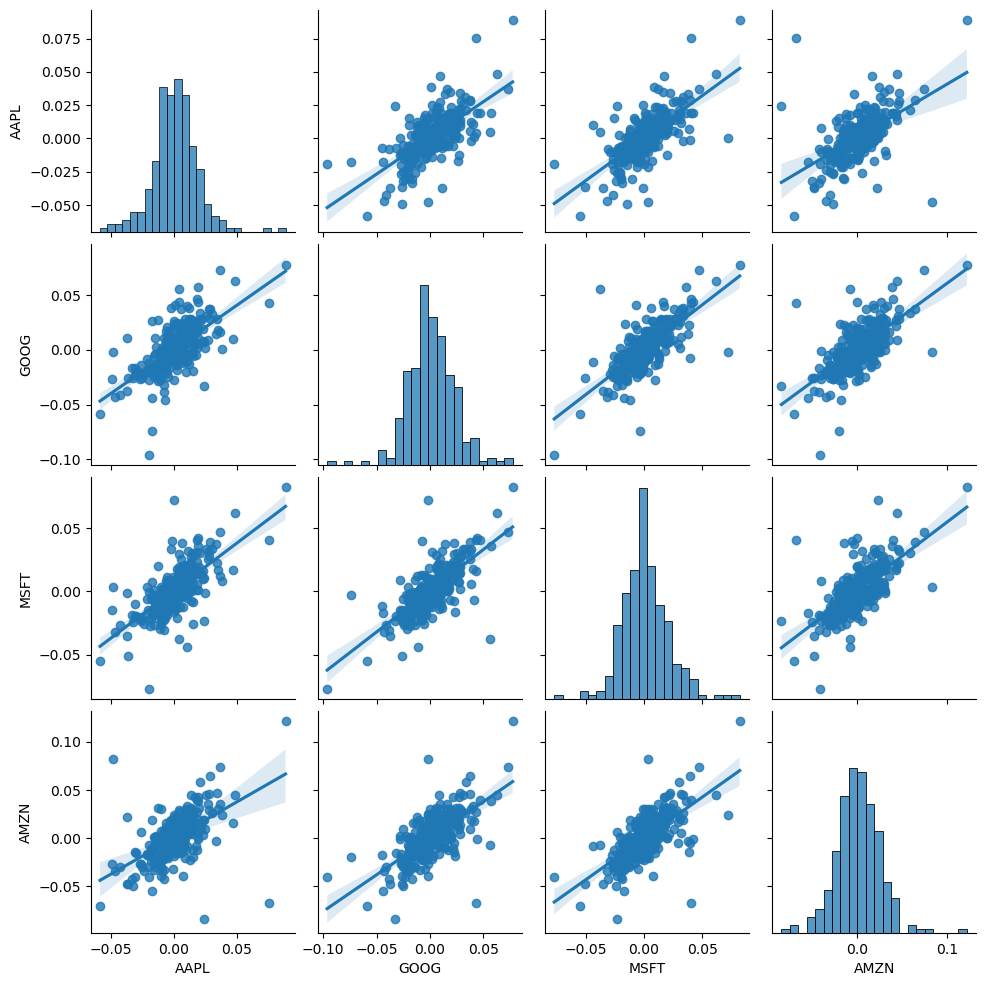

In [36]:
sns.pairplot(tech_returns_df, kind='reg')

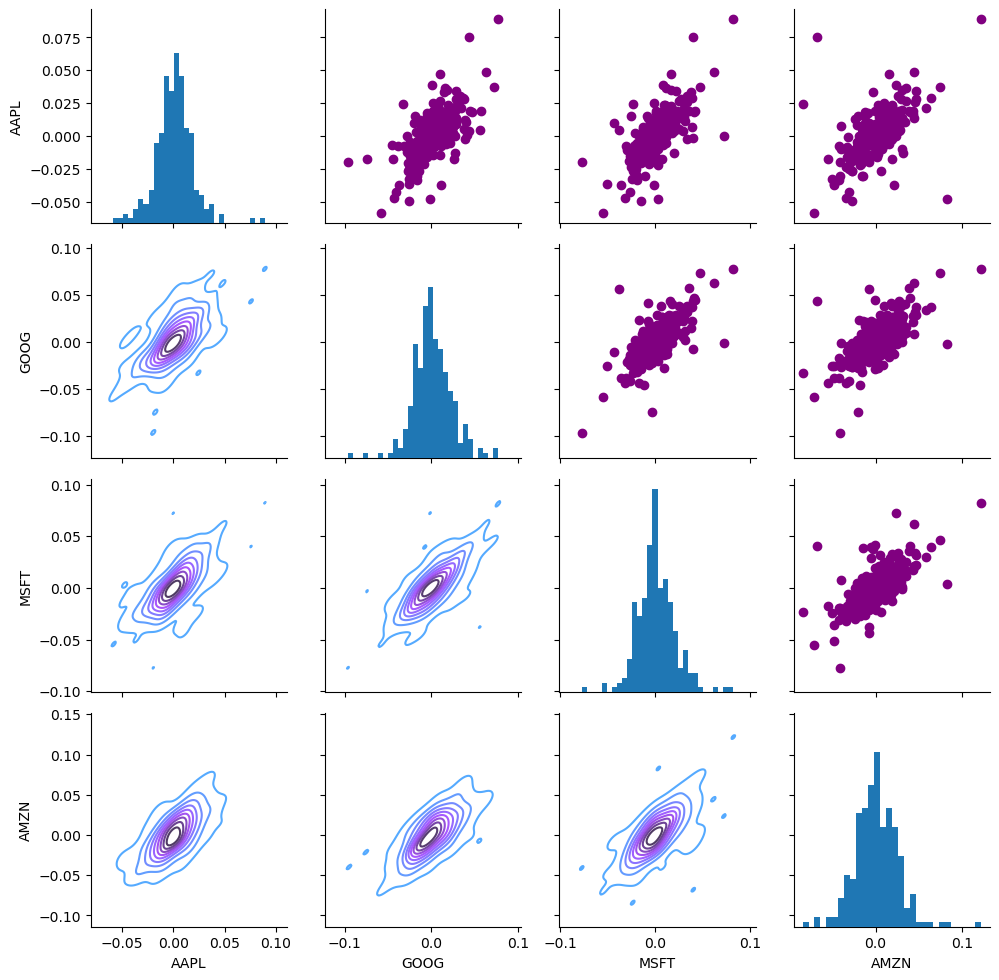

In [38]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_returns_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock return')

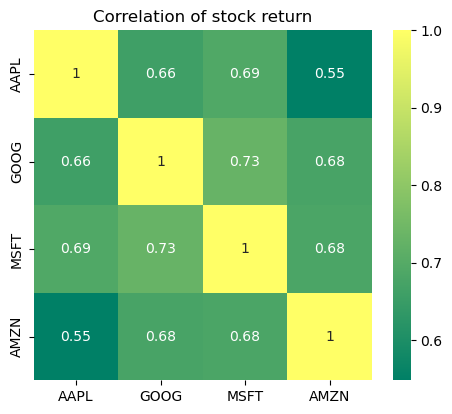

In [45]:
tech_returns_df.dropna(inplace=True)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_returns_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')


In [48]:
!pip install --upgrade pandas pandas-datareader yfinance

In [50]:
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

[*********************100%%**********************]  1 of 1 completed


In [51]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466093,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533086,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672227,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400
...,...,...,...,...,...,...
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900


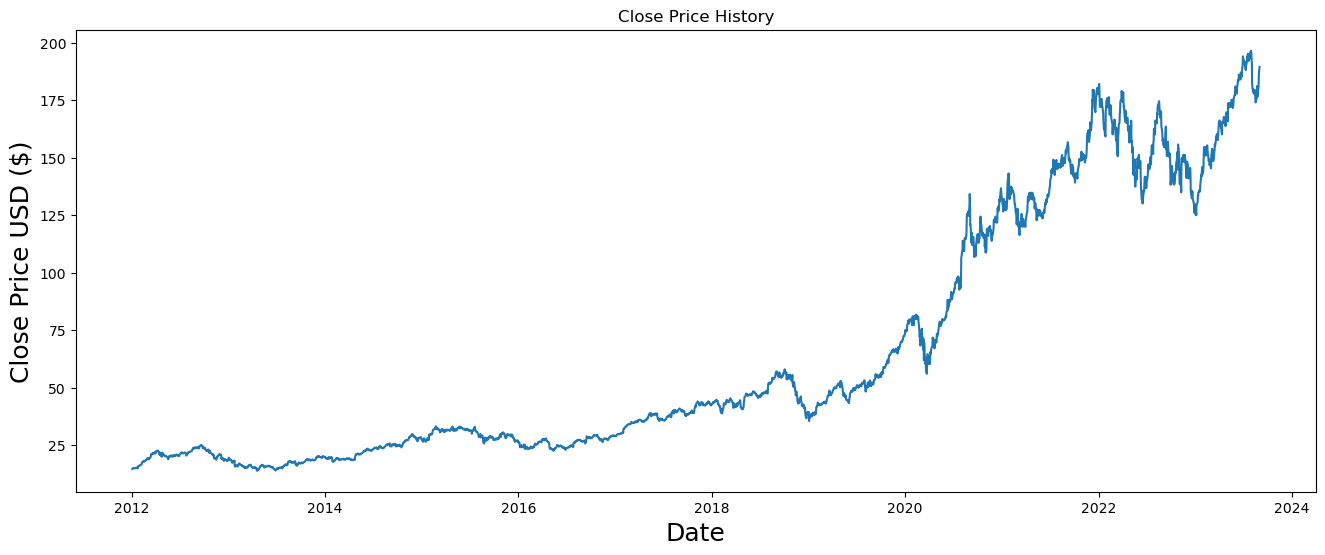

In [52]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [53]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2790

In [54]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.95178146],
       [0.95298693],
       [0.96169921]])

In [55]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2730/2730 [==============================] - 74s 24ms/step - loss: 0.0013


In [57]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 6s 20ms/step


3.9254771649570834

C:\Users\sabar\AppData\Local\Temp\ipykernel_11156\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


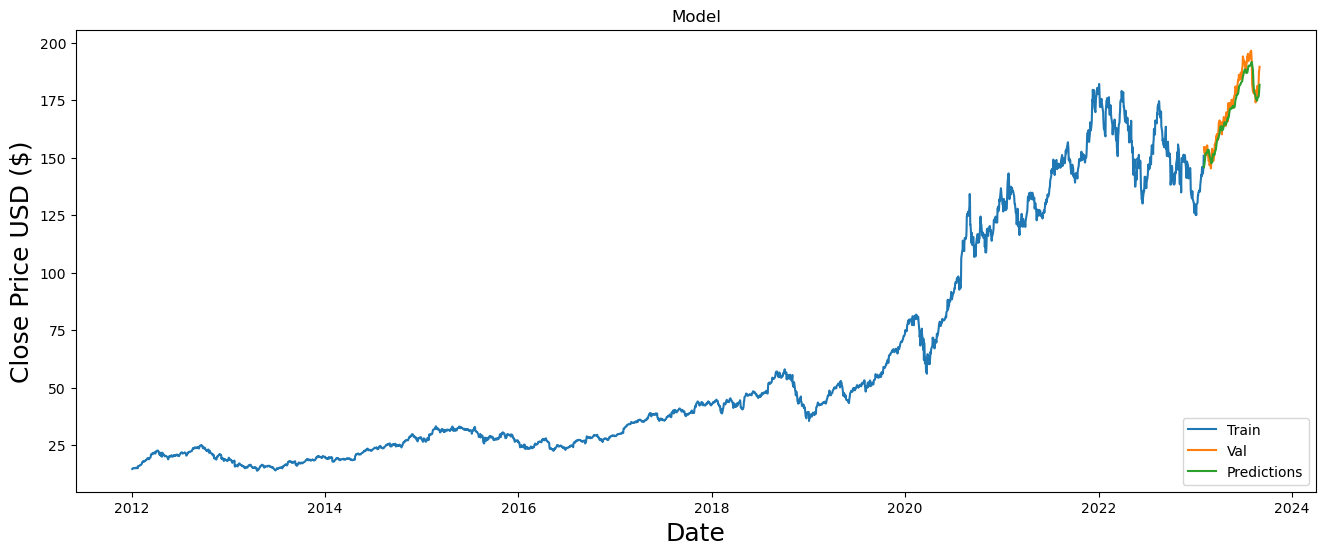

In [58]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [59]:
valid

,Close,Predictions
Date,,
2023-02-03,154.500000,145.885742
2023-02-06,151.729996,148.014145
2023-02-07,154.649994,149.532501
2023-02-08,151.919998,151.063782
2023-02-09,150.869995,151.796799
...,...,...
2023-08-28,180.190002,176.337723
2023-08-29,184.119995,176.878403
2023-08-30,187.649994,178.087646
